# Aprendizado de comitês

O aprendizado de comitês consiste de uma abordagem para combinar várias técnicas de aprendizado supervisionado em um modelo preditivo. É contruída uma coleção de preditores com a finalidade de produzir uma predição melhor do que cada preditor separadamente, diminuindo a variância, o viés ou melhorando a força preditiva. Podem ser aplicados em problemas de classificação e de regressão.

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Dataset

Afim de explorar os modelos de aprendizado por comitês será utilizado um dataset que contém dados de uma instituição financeira ficticia contendo o histórico de crediário oferecido aos clientes. O dataset contém informações como o estado civil (ESCT), número de dependentes (NDEP), renda familiar (RENDA), tipo de residência (TIPOR), valor do bem a ser adquirido (VBEM), número de parcelas (NPARC), valor da parcela (VPARC), se o cliente possui telefone (TEL), idade do cliente (IDADE), tempo de moradia em meses (RESMS), valor da entrada (ENTRADA) e se o cliente pagou a dívida (CLASSE). Dado o dataset, o objetivo dos modelos de aprendizado de comitês é prever se um novo cliente que submeteu uma requisição de impréstimo pagará ou não a dívida. O conjunto de treinamento possui 1500 exemplos e o conjunto de testes possui 577 exemplos. Serão realizados experimentos com os algoritmos de _Boosting_ e _Bagging_ para a criação dos modelos de classificação.

In [8]:
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']
data = pd.read_csv('data/credtrain.txt', sep='\t', header=None, names=headers)
data_test = pd.read_csv('data/credtest.txt', sep='\t', header=None, names=headers)

In [13]:
data.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [14]:
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


Como pode ser observado nas tabelas apresentadas com o conjunto de dados, as características possuem ordem de grandeza diferentes, o que pode gerar resultados inadequados, portanto após o preprocessamento deve ser feita a normalização dos dados utilizando a classe _StandardScaler_, que normaliza os dados utilizando o $z$-score.

In [15]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

X_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test.iloc[:, -1])

ss = StandardScaler()
X_norm = ss.fit_transform(X)
X_test_norm = ss.fit_transform(X_test)

## Boosting

Algoritmos de _Boosting_ consistem da composição sequencial de diferentes modelos de aprendizado mais fracos (_weak learner_), compensando a fraqueza do modelo anterior afim de produzir um modelo de maior acurária (_strong learner_).

Para avaliar os algoritmos de _Boosting_ serão criados modelos de classificação utilizando os indutores _AdaBoost_ e _GradientBoosting_.

### AdaBoost

_AdaBoost_ (_Adaptative Boosting_) é um algoritmo de _Boosting_. O algoritmo funciona de maneira iterativa, em cada iteração é realizado o treinamento dos classificadores fracos, dado o resultado do treinamento é computado o erro e dado o erro é atualizada a distribuição de pesos, desta forma os classificadores se ajustam para compensar os erros dos classificadores anteriores.

Para treinar um classificador AdaBoost será utilizada da classe AdaBoostClassifier da biblioteca _Scikit Learn_. O modelo é ajustado e então é analisada a acurácia do modelo com a função _classification\_report_. Em seguida é apresentada a curva de aprendizado do modelo. Para gerar a curva de aprendizado o conjunto de dados é dividido sendo 80% utilizado para o treinamento e 20% para validação, a divisão é feita utilizando a classe _ShuffleSplit_ e a curva de aprendizado é gerada com a função _learning\_curve_.

In [6]:
model_ab = AdaBoostClassifier()
model_ab.fit(X, y)

y_pred_ab = model_ab.predict(X_test)

print(classification_report(y_pred_ab, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       325
           1       0.82      0.88      0.85       252

    accuracy                           0.87       577
   macro avg       0.86      0.87      0.87       577
weighted avg       0.87      0.87      0.87       577



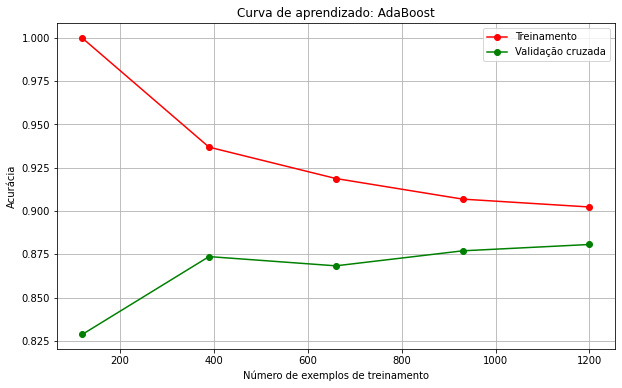

In [7]:
cv = ShuffleSplit(test_size=0.2, random_state=31)

train_sizes, train_scores, test_scores = learning_curve(model_ab, X, y, scoring='accuracy', cv=cv)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Curva de aprendizado: AdaBoost")
ax.set_xlabel("Número de exemplos de treinamento")
ax.set_ylabel("Acurácia")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação cruzada")
ax.legend()
plt.show()

### Gradient Boosting

O algoritmo _GradientBoosting_ é uma generalização do algoritmo _AdaBoost_ que além de problemas de classificação também é capaz de resolver problemas de regressão. O algoritmo introduz a função de custo no treinamento dos _weak learners_ e utiliza o gradiente descendente para reduzir o valor desta função de custo.

Para treinar um classificador _Gradient Boosting_ é utilizada a classe _GradientBoostingClassifier_ da biblioteca _Scikit Learn_. Após o treinamento do modelo é utilizada a função _classification\_report_ para avaliar a acurácia do modelo, conforme pode ser observado abaixo o modelo apresenta uma acurácia melhor que o modelo _AdaBoost_. Em seguida é apresentado o gráfico da curva de aprendizado, os dados são divididos da mesma maneira que foi feita para o _AdaBoost_.

In [8]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X, y)

y_pred_gb = model_gb.predict(X_test)

print(classification_report(y_pred_gb, y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       342
           1       0.83      0.96      0.89       235

    accuracy                           0.90       577
   macro avg       0.90      0.91      0.90       577
weighted avg       0.91      0.90      0.90       577



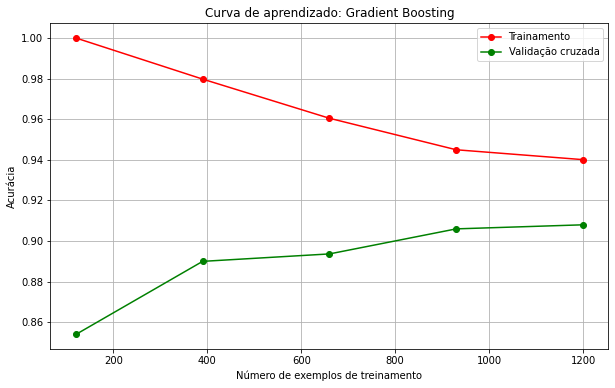

In [9]:
cv = ShuffleSplit(test_size=0.2, random_state=31)

train_sizes, train_scores, test_scores = learning_curve(model_gb, X, y, scoring='accuracy', cv=cv)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Curva de aprendizado: Gradient Boosting")
ax.set_xlabel("Número de exemplos de treinamento")
ax.set_ylabel("Acurácia")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Trainamento")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação cruzada")
ax.legend()
plt.show()

## Bagging

Os algoritmos _Bagging_ têm o objetivo de melhorar a estabilidade e a acurária dos algoritmos de aprendizado de máquina utilizados para classificação e regressão. Os algoritmos de _Bagging_ consistem da construção de vários estimadores utilizando os mesmo algoritmo, e treiná-los com amostragens aleatórias do conjuntos de dados. A predição é obtida a partir da agregação dos resultados destes estimadores.

### BaggingClassifier com $k$-NN

Para treinar um classificador _Bagging_ será utilizada a classe _BaggingClassifier_ da biblioteca _Scikit Learn_. O classificador irá utilizar como estimador base o algoritmo $k$-NN. Para ajustar o modelo serão utilizados os dados normalizados do conjunto de treinamento. Em seguida é apresentada acurácia do modelo utilizando a função _classification\_report_ e é apresentada a curva de aprendizado utilizando a função _learning\_curve_. Para a geração da curva de aprendizado o conjunto de dados é divido em 80% dos dados para treinamento e 20% para validação.

In [10]:
model_bc = BaggingClassifier(base_estimator=KNeighborsClassifier())
model_bc.fit(X_norm, y)

y_pred_bc = model_bc.predict(X_test_norm)

print(classification_report(y_pred_bc, y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       340
           1       0.79      0.91      0.85       237

    accuracy                           0.86       577
   macro avg       0.86      0.87      0.86       577
weighted avg       0.87      0.86      0.87       577



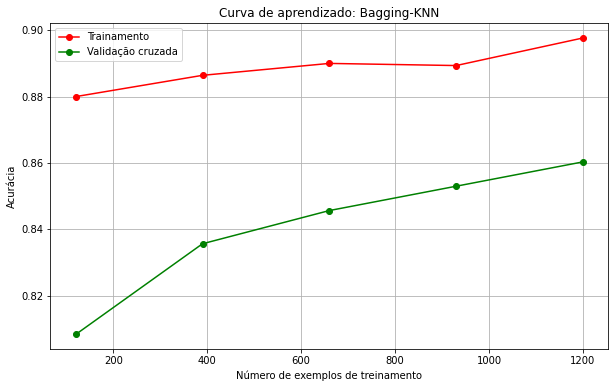

In [11]:
cv = ShuffleSplit(test_size=0.2, random_state=31)

train_sizes, train_scores, test_scores = learning_curve(model_bc, X_norm, y, scoring='accuracy', cv=cv)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Curva de aprendizado: Bagging-KNN")
ax.set_xlabel("Número de exemplos de treinamento")
ax.set_ylabel("Acurácia")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Trainamento")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação cruzada")
ax.legend()
plt.show()

### Random Forest

_Random Forest_ é um método de aprendizado de comitês que pode ser utilizado para classificação e regressão. O método consiste na criação de várias árvores de decisão com diferentes amostragens do conjunto de dados de maneira aleatória, e agregar os resultados das árvore de decisão calculando a média dos resultados para melhorar a acurácia da precisão.

Para treinar um classificador _Random Forest_ será utilizada a classe _RandomForestClassifier_ da biblioteca _Scikit Learn_. Em seguida é apresentada a acurácia do modelo utilizando a função _classification\_report_ e a curva de aprendizado utilizando a função _learning\_curve_. Conforme pode ser observado a acurácia da _Random Forest_ é melhor do que o modelo de _Bagging_ com $k$-NN. Para a geração da curva de aprendizado o conjunto de dados é divido em 80% dos dados para treinamento e 20% para validação.

In [12]:
model_rf = RandomForestClassifier()
model_rf.fit(X_norm, y)

y_pred_rf = model_rf.predict(X_test_norm)

print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       344
           1       0.83      0.97      0.89       233

    accuracy                           0.91       577
   macro avg       0.90      0.92      0.90       577
weighted avg       0.92      0.91      0.91       577



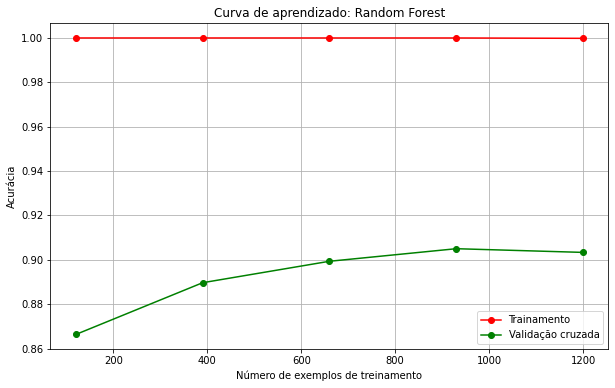

In [13]:
cv = ShuffleSplit(test_size=0.2, random_state=31)

train_sizes, train_scores, test_scores = learning_curve(model_rf, X_norm, y, scoring='accuracy', cv=cv)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Curva de aprendizado: Random Forest")
ax.set_xlabel("Número de exemplos de treinamento")
ax.set_ylabel("Acurácia")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Trainamento")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação cruzada")
ax.legend()
plt.show()